# Podstawy Sztucznej Inteligencji 2018/2019



Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# Klasyfikator kNN

Notatnik ten zawiera implementacją klasyfikatora kNN (k najbliższych sąsiadów z ang. k nearest neighbours).  W tej metodzie klasyfikowany obiekt przydzielamy do tej klasy, do której należy większość z jego `k` sąsiadów.


**1\. Generacja danych.**

Tym razem, zamiast wczytywać dane, wygeneruj je z wykorzystaniem funkcji [make_blobs](http://scikit-learn.org/0.16/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). 

Ustaw ilość próbek na `500`, a ilość grup (centrów) na `3`. Ponadto, aby twoje rysunki były identyczne jak przedstawione poniżej, ważne jest ustawienie `random_state=2`.


In [1]:
%matplotlib inline
import numpy as np 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.neighbors import NearestCentroid
import matplotlib.pyplot as plt

# metoda generujaca dane treningowe i testowe
from sklearn.datasets import make_blobs

blobs_data = None
blobs_target = None

# YOUR CODE HERE

blobs_data, blobs_target = make_blobs(n_samples=500, centers=3, random_state=2)

In [2]:
assert blobs_data.shape == (500, 2)
assert blobs_data.shape[0] == blobs_target.shape[0]

**Wizualizacja wygenerowanych danych**

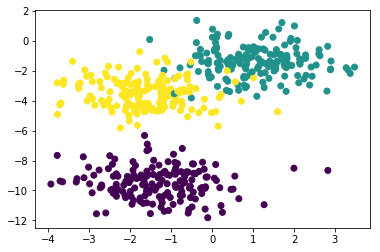

In [3]:
plt.scatter(blobs_data[:,0], blobs_data[:,1],c=blobs_target)

Powyższy wykres powinien wyglądać następująco:

![title](blobs.png)

**2\. Normalizacja danych wejściowych**

Przed rozpoczęciem należy zapewnić bezpośrednią porównywalność cech, czyli dokonać normalizacji. Skorzystaj ze wzoru z [Definicji 2](http://books.icse.us.edu.pl/runestone/static/ai/IstotaUczeniaNadzorowanegoINienadzorowanego/ReprezentacjaWzorcow.html#przetwarzanie-wstepne) 
 

 

In [4]:
def normalize(v):
    normalized = []
    for i in range(len(v[0])):
        mean = np.mean(v[:,i])
        std = np.std(v[:,i])
        normalized.append((v[:,i] - mean) / std )
    normalized = np.array(normalized).T
    return normalized

In [5]:
blobs_data_normalized = normalize(blobs_data)
np.testing.assert_array_almost_equal(blobs_data_normalized[100], np.array([0.39173587, 0.67031484]))

*Wykres po normalizacji*

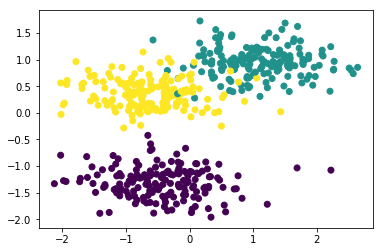

In [6]:
plt.scatter(blobs_data_normalized[:,0], blobs_data_normalized[:,1],c = np.ravel(blobs_target))

Powyższy wykres powinien wyglądać następująco:

![title](norm_blobs.png)

**3\. Podział na dane treningowe i testowe.**

W sposób losowy podziel wygenerowane dane na zbiór uczący i testowy w proporcji 70% do 30%. 

Wykorzystaj w tym celu narzędzie  `train_test_split` z `from sklearn.model_selection import`.
Ustaw `random_state=123` (tylko w tym przypadku zadziałają automatyczne testy).

In [7]:
train, test, train_labels, test_labels = train_test_split(blobs_data_normalized, blobs_target, test_size=0.3, random_state=123)

In [8]:
assert train.shape[1] == 2
assert len(train.shape) == 2
assert len(train_labels.shape) == 1

assert np.shape(train)[0] == 0.7 * np.shape(blobs_data_normalized)[0]
assert np.shape(test)[0] == np.shape(blobs_data_normalized)[0] - np.shape(train)[0]

In [9]:
np.sqrt(np.sum((test[0] - train[1])**2))

1.3431124281080473

**4\. Odległość wektorów testowych danych treningowych**

Dla każdego wektora z danych testowych wyznacz odległość od wszystkich punktów treningowych.

In [10]:
def distances(x):
    global train
    distances_ = []
    if x.shape == (2,):
        for k in range(len(train)):
            distances_.append(np.sqrt((np.sum((x - train[k])**2))))
        return np.array(distances_)
    for i in range(len(x)):
        distances_.append([])
        for k in range(len(train)):
            distances_[i].append(np.sqrt((np.sum((x[i] - train[k])**2))))
    return np.array(distances_)

a = distances(test)

In [11]:
assert distances(test[0]).shape == (350,)
assert distances(test[0])[1]==1.3431124281080467

AssertionError: 

**5\. Znajdź `k` najbliższych sąsiadów**

Dla każdego wektora z danych testowych znajdź klasy `k` najbliższych danych treningowych. Wykorzystaj sortowanie.

In [12]:
def k_nearest_classes(x, k=3):
    global train_labels
    knn = []
    if x.shape == (2,):
        dis = distances(x)
        sorted_distances = sorted(distances(x))
        for i in range(k):
            knn.append(train_labels[np.where(sorted_distances[i] == dis)[0][0]])
        return knn
        
    for i in range(len(x)):
        dis = distances(x[i])
        sorted_distances = sorted(distances(x[i]))
        knn.append([])
        for l in range(k):
            knn[i].append(train_labels[np.where(sorted_distances[l] == dis)[0][0]])
    return knn

In [13]:
k_nearest_classes(test)

[[2, 2, 2],
 [2, 2, 2],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 2],
 [2, 1, 1],
 [2, 2, 2],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [2, 2, 2],
 [0, 0, 0],
 [0, 0, 0],
 [2, 2, 1],
 [1, 1, 1],
 [2, 2, 2],
 [1, 1, 1],
 [1, 1, 1],
 [2, 2, 2],
 [1, 1, 1],
 [2, 2, 2],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [2, 2, 2],
 [1, 1, 1],
 [2, 2, 2],
 [0, 0, 0],
 [1, 1, 1],
 [2, 2, 2],
 [0, 0, 0],
 [2, 2, 2],
 [0, 0, 0],
 [2, 1, 2],
 [0, 0, 0],
 [2, 2, 2],
 [2, 2, 2],
 [1, 1, 1],
 [2, 2, 2],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [2, 2, 2],
 [2, 2, 2],
 [0, 0, 0],
 [0, 0, 0],
 [2, 2, 2],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [2, 2, 2],
 [0, 0, 0],
 [2, 2, 2],
 [2, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [2, 1, 2],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [2, 2, 2],
 [1, 1, 1],
 [2, 1, 2],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 2],
 [1,

In [14]:
k = 3
np.testing.assert_array_equal( k_nearest_classes(test[0], k), [2,2,2])

**6\. Funkcja klasyfikująca**

W głosowaniu wsród najbliższych sąsiadów wyznacz klasę wektora testowego.

In [15]:
def classify(x, k=1):
    classes = k_nearest_classes(x, k)
    class_ = []
    for i in range(len(classes)):
        counts = np.bincount(classes[i])
        class_.append(np.argmax(counts))
    return np.array(class_)
        

In [16]:
assert classify(test, k).shape == (150,)
assert classify(test, k)[100]==2
assert np.all( classify(test,3)[:5] ==  [2, 2, 0, 1, 0] )

**7\. Jaki jest procent poprawych odpowiedzi?**

In [17]:
Z = classify(test, 3)
score = np.sum(Z == test_labels)/ len(Z)

In [18]:
np.testing.assert_almost_equal(score, 0.98)

In [19]:
test[0]

array([-0.09483074,  0.41977497])

**8\. Stwórz klasę `kNNClassifier` analogiczną do klasy `sklearn.neighbors.KNeighborsClassifier`**

In [20]:
class kNNClassifier():
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        
        
    #zapamietaj dane treningowe
    def fit(self, train, train_labels):
        self.train = train
        self.train_labels = train_labels
    
    #metoda wyznaczjaca odległości
    def distances(self, x):
        distances_ = []
        if x.shape == (2,):
            for k in range(len(self.train)):
                distances_.append(np.sqrt((np.sum((x - self.train[k])**2))))
            return np.array(distances_)
    
        for i in range(len(x)):
            distances_.append([])
            for k in range(len(self.train)):
                distances_[i].append(np.sqrt((np.sum((x[i] - self.train[k])**2))))
            return np.array(distances_)
        
        
    #znajdź klasy k sąsiadów
    def kneighbors(self, x, k):
        knn = []
        if x.shape == (2,):
            dis = self.distances(x)
            sorted_distances = sorted(self.distances(x))
            for i in range(k):
                knn.append(self.train_labels[np.where(sorted_distances[i] == dis)[0][0]])
            return knn

        for i in range(len(x)):
            dis = self.distances(x[i])
            sorted_distances = sorted(self.distances(x[i]))
            knn.append([])
            for l in range(k):
                knn[i].append(self.train_labels[np.where(sorted_distances[l] == dis)[0][0]])
        return knn
    
    
    #wyznacza klasę dla każdej danej testowej
    def predict(self, test):
        classes = self.kneighbors(test, self.n_neighbors)
        class_ = []
        for i in range(len(classes)):
            counts = np.bincount(classes[i])
            class_.append(np.argmax(counts))
        return np.array(class_)
    
    #wyznacza dokładność klasyfikatora
    def score(self, test, test_labels):
        Z = self.predict(test)
        score = np.sum(Z == test_labels)/ len(Z)
        return score
        

In [21]:
clf = kNNClassifier(k)
clf.fit(train, train_labels)
clf.score(test, test_labels)
np.testing.assert_almost_equal(score, clf.score(test, test_labels))

**9\. Porównanie z klasyfikatorem `sklearn.neighbors.KNeighborsClassifier`**

In [22]:
from sklearn.neighbors import KNeighborsClassifier 

ncent = KNeighborsClassifier(k)
ncent.fit(train, train_labels)
np.testing.assert_array_almost_equal(ncent.predict(test),  clf.predict(test))
assert ncent.score(test, test_labels) == clf.score(test, test_labels)


In [23]:
h = .02
x_min, x_max = train[:, 0].min() - 1, train[:, 0].max() + 1
y_min, y_max = train[:, 1].min() - 1, train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

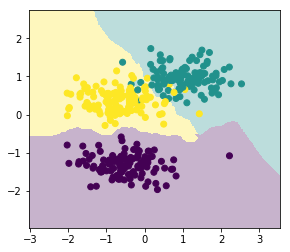

In [24]:
Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=[x_min,x_max,y_min,y_max],origin='lower',alpha=0.3)#,cmap='GnBu')
plt.scatter(train[:,0], train[:,1],c=np.ravel(train_labels))

**10\. Dane wczytane z pliku `.npz`**

Wczytaj dane testowe z pliku `banana.npz` za pomocą `np.load`. Plik ten zawiera dane i etykiety (ustal jak się do nich dobrać). 

Znormalizuj je i podziel je na dane treningowe i testowe w proporcji jak w pkt. 3. Przy dzieleniu ustaw `random_state=333`. 



In [144]:
import numpy as np

load_banana = np.load('banana.npz')
banana_data = load_banana['data']
banana_target = load_banana['labels']
banana_data_normalized = normalize(banana_data)
train, test, train_labels, test_labels = train_test_split(banana_data_normalized, banana_target, test_size = 0.3, random_state = 333)


from sklearn.model_selection import train_test_split


**Wykres danych po normalizacji**

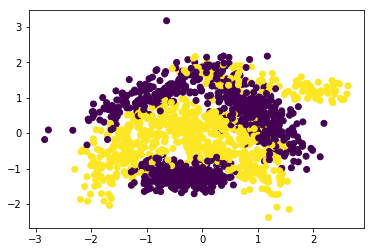

In [ ]:
plt.scatter(banana_data_normalized[:,0], banana_data_normalized[:,1], c=banana_target)

Powyższy wykres powinien wyglądać następująco:

![title](banana_norm.png)

**Dokładność klasyfikatora kNN dla powyższych danych**

In [ ]:
k = 1
clf = kNNClassifier(k)
clf.fit(train, train_labels)
np.testing.assert_almost_equal(clf.score(test, test_labels),  0.8577, decimal=3)
clf.score(test, test_labels)

0.8577777777777778

### Własności kNN


Poeksperymentuj ! Narysuj obszar decyzyjny i zbadaj jak dokładność zależy od liczby sąsiadów.

In [ ]:
k = 1
clf = kNNClassifier(k)
clf.fit(train, train_labels)
h = .02
x_min, x_max = train[:, 0].min() - 1, train[:, 0].max() + 1
y_min, y_max = train[:, 1].min() - 1, train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

In [ ]:
Z = Z.reshape(xx.shape)
plt.imshow(Z,extent=[x_min,x_max,y_min,y_max], origin='lower',alpha=0.2)
plt.title('k=%d'%k)
plt.scatter(train[:,0], train[:,1], c=train_labels, marker='.')

In [ ]:
s = []
for k in range(1,110,3):
    clf = kNNClassifier(k)
    clf.fit(train, train_labels) 
    s.append( (clf.score(test, test_labels) ,clf.score(train, train_labels)) ) 
s = np.array(s)

In [ ]:
plt.figure(figsize=(12,4))
plt.grid(True)
plt.plot(s[:,0],'b-',s[:,1],'r-')